In [ ]:
#importing the dataset using pandas
import pandas as pd
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\Linear Regression\Data_Sets\height-weight.csv")
df.head()     #used to see top 5 records

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
df.shape    #used to seee the number of rows and number of columns

(23, 2)

In [ ]:
df.info()     #tells the basic information like column datatype...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [ ]:
df.describe()   #tells the count,mean,standard deviation,minimum,maximum,

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [ ]:
df.isnull().sum()    #chech is there any null value or not 

Weight    0
Height    0
dtype: int64

In [ ]:
df.duplicated().sum()     #check is there any duplicated value or not

np.int64(1)

In [ ]:
df=df.drop_duplicates()     #droping the duplicates

In [12]:
df.shape

(22, 2)

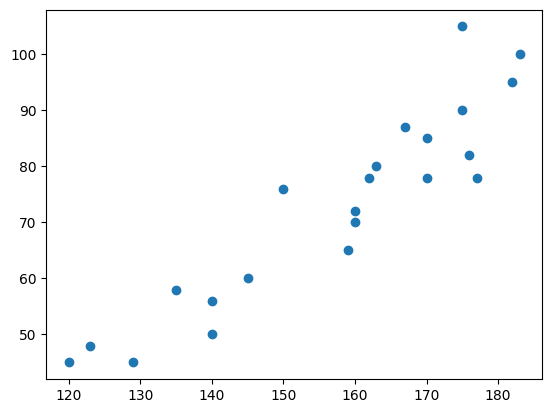

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["Height"],df["Weight"])   #ploting height and weight

In [ ]:
x=df[["Height"]]   #consider as 2 d array
y=df["Weight"]


In [ ]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=20)

In [81]:
x_train.head(5)

,Height
14,170
15,177
13,183
21,140
22,160


In [82]:
'''scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_test'''

'scaler=StandardScaler()\nx_train=scaler.fit_transform(x_train)\nx_test=scaler.transform(x_test)\nx_test'

In [85]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape
x_test

,Height
18,150
17,159
20,129
4,160
1,135


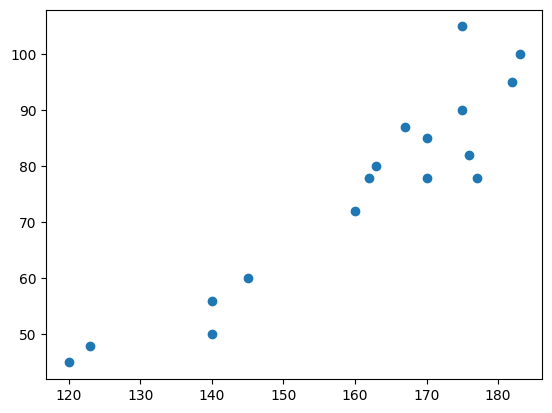

In [86]:
plt.scatter(x_train,y_train)

In [ ]:
#building the linear model using the training data 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#predicting the output using test data
predict=model.predict(x_test)
predict
#predicted test data

array([66.8161317 , 74.55844546, 48.75073292, 75.41870255, 53.91227543])

In [ ]:
#original test data
y_test

18    76
17    65
20    45
4     70
1     58
Name: Weight, dtype: int64

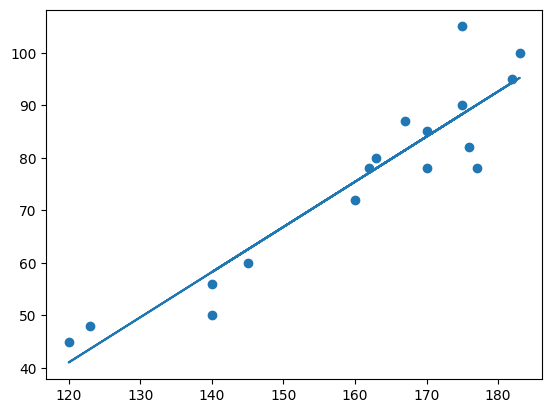

In [98]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))

In [ ]:
print(model.coef_)   #slope of the data
print(model.intercept_)  #intercept of the data

[0.86025708]
-62.222431030594564


In [ ]:
#calcuation of the metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
r2=r2_score(y_test,predict)
mse=mean_squared_error(y_test,predict)
mae=mean_absolute_error(y_test,predict)
print(r2)
print(mae)
print(mse)

0.5868129930822539
6.3998947605803265
47.16942870972989


In [109]:
model.predict([[156]])

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.97767421])

In [ ]:
#saving the model using pickle 
import pickle
pickle.dump(model,open("linear model.pkl","wb"))

In [ ]:
#loading the saved file
loadedmodel=pickle.load(open("linear model.pkl","rb"))

In [113]:
loadedmodel.predict([[190]])

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101.22641509])